In [1]:
%matplotlib inline

In [2]:
import adaboost
import numpy as np
import pandas as pd

In [3]:
train_data,train_label = adaboost.load_data_set('horseColicTraining.txt')
test_data,test_label = adaboost.load_data_set('horseColicTest.txt')

In [4]:
pd.DataFrame(train_data)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2.0,1.0,38.5,66.0,28.0,3.0,3.0,0.0,2.0,5.0,...,4.0,0.0,0.0,0.0,3.0,5.0,45.0,8.4,0.0,0.0
1,1.0,1.0,39.2,88.0,20.0,0.0,0.0,4.0,1.0,3.0,...,2.0,0.0,0.0,0.0,4.0,2.0,50.0,85.0,2.0,2.0
2,2.0,1.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,33.0,6.7,0.0,0.0
3,1.0,9.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,...,4.0,1.0,2.0,5.0,3.0,0.0,48.0,7.2,3.0,5.3
4,2.0,1.0,37.3,104.0,35.0,0.0,0.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74.0,7.4,0.0,0.0
5,2.0,1.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,2.0,...,2.0,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
6,1.0,1.0,37.9,48.0,16.0,1.0,1.0,1.0,1.0,3.0,...,3.0,1.0,1.0,0.0,3.0,5.0,37.0,7.0,0.0,0.0
7,1.0,1.0,0.0,60.0,0.0,3.0,0.0,0.0,1.0,0.0,...,2.0,2.0,1.0,0.0,3.0,4.0,44.0,8.3,0.0,0.0
8,2.0,1.0,0.0,80.0,36.0,3.0,4.0,3.0,1.0,4.0,...,4.0,2.0,1.0,0.0,3.0,5.0,38.0,6.2,0.0,0.0
9,2.0,9.0,38.3,90.0,0.0,1.0,0.0,1.0,1.0,5.0,...,1.0,2.0,1.0,0.0,3.0,0.0,40.0,6.2,1.0,2.2


In [5]:
pd.DataFrame(train_label)

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
5,1.0
6,1.0
7,0.0
8,0.0
9,1.0


In [6]:
train_data,train_label = np.array(train_data),np.array(train_label)
test_data,test_label = np.array(test_data),np.array(test_label)
train_label[train_label == 0] = -1
test_label[test_label == 0] = -1

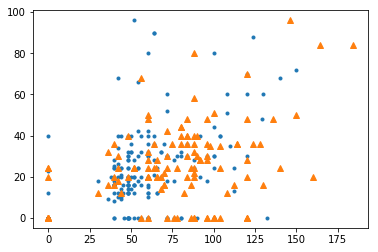

In [7]:
adaboost.draw_graph(train_data[:,3],train_data[:,4],labels=train_label)

In [8]:
weak_clf_arr = adaboost.adaboost_train_ds(train_data,train_label)

TypeError: 'float' object cannot be interpreted as an integer